In [1]:
# EDA(Exploratory Data Analysis : 탐색적 데이터 분석) #이진분류 분석 (로지스틱 분류 모델 전처리, 및 결과 해석 평가)
#오늘 목표, 포켓몬 데이터의 기본 정보를 탐색하고, 데이터 특징을 탐색하여 지도학습 기반 다양한 분류 분석 이용하여, 해석 및 평가를 한다. 
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 13)

In [5]:
# 데이터셋 기본 정보 탐색 : NAN 값을 찾고, 데이터 타입 확인을 통해 어떻게 분석할지 생각하기 

df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
#개별 피처 탐색
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [8]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [9]:
gen_count= df['Generation'].value_counts()

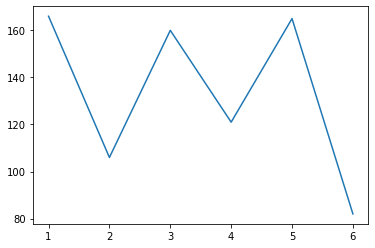

In [10]:
gen_count.sort_index().plot()

In [11]:
df['Type 1'].unique() #어떤 유형의 타입이 있는지 확인하는 방법


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [12]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
len(df['Type 1'].unique())

18

In [14]:
len(df[df['Type 2'].notnull()]['Type 2'].unique()) #nan도 한개의 타입으로 인식 

18

In [15]:
len(df['Type 2'].unique())

19

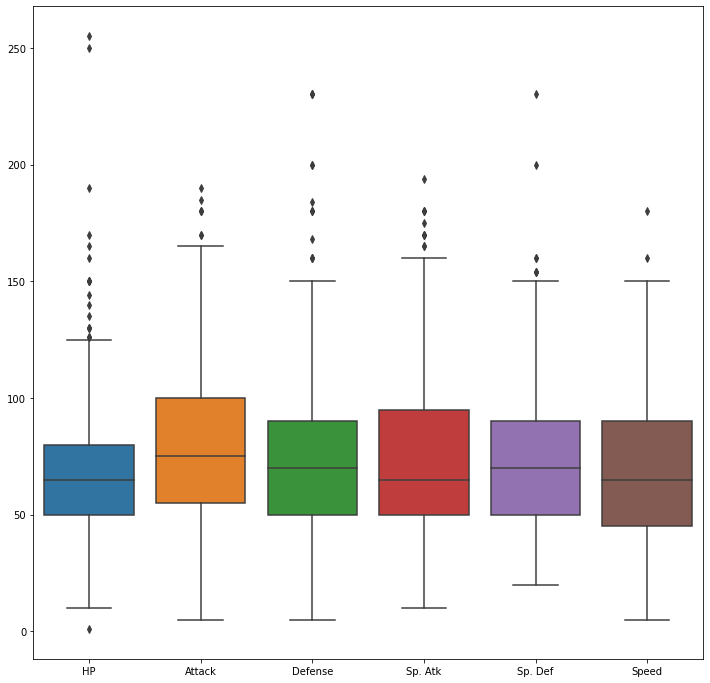

In [16]:
# 변수들의 분포 탐색 

fig = plt.figure(figsize= (12,12))
ax = fig.gca() 
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

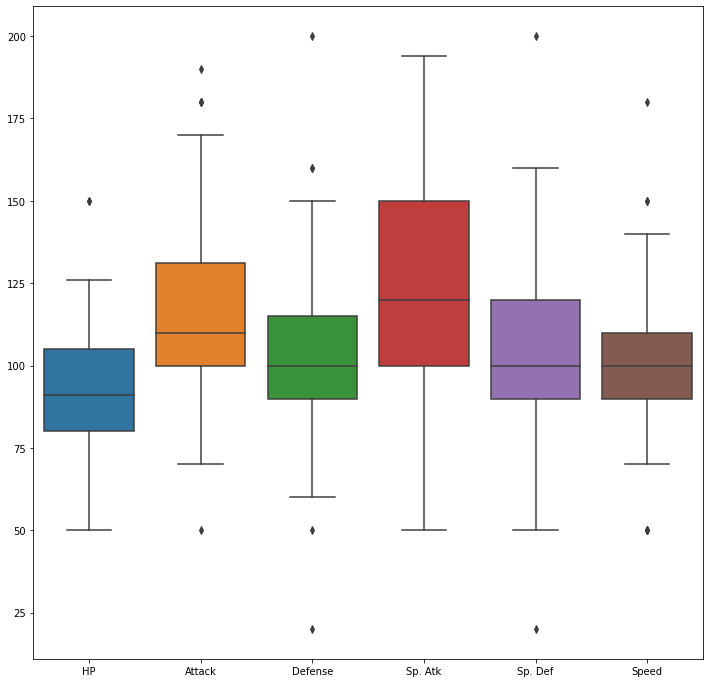

In [18]:
fig = plt.figure(figsize= (12,12))
ax = fig.gca() 
sns.boxplot(data=df[df['Legendary']==1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

#박스플롯에 따르면 레전드 캐릭터가 전체적인 공격력인 일반 캐릭터보다 높다. 

In [19]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


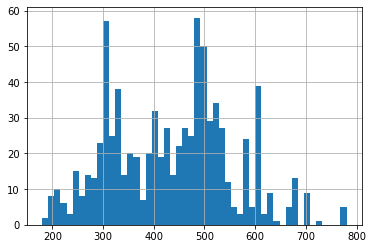

In [21]:
df['Total'].hist(bins=50)

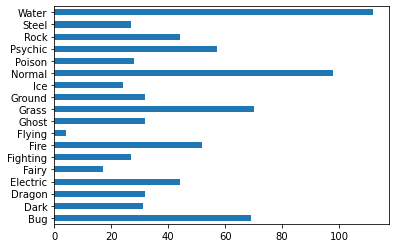

In [35]:
df['Type 1'].value_counts(sort=False).sort_index().plot.barh()

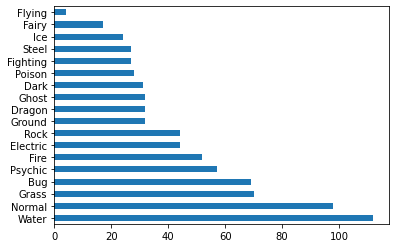

In [33]:
df['Type 1'].value_counts(sort=True).sort_index().plot.barh()

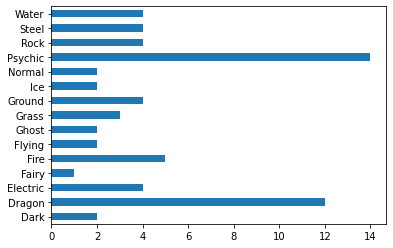

In [34]:
df[df['Legendary']==1]['Type 1'].value_counts(sort=False).sort_index().plot.barh()

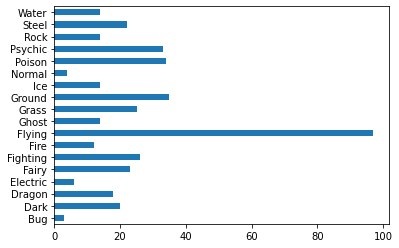

In [37]:
df['Type 2'].value_counts(sort=False).sort_index().plot.barh()

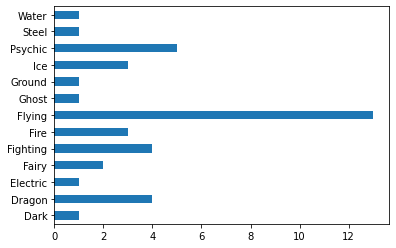

In [38]:
df[df['Legendary']==1]['Type 2'].value_counts(sort=False).sort_index().plot.barh()

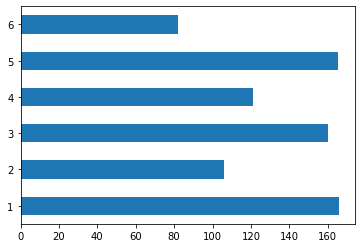

In [39]:
df['Generation'].value_counts().sort_index().plot.barh()

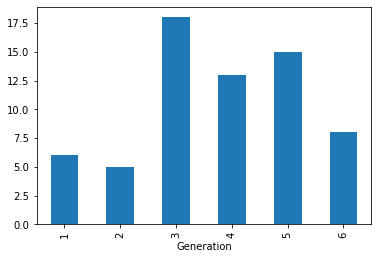

In [57]:
groups=df[df['Legendary']==1].groupby('Generation').size()
groups.plot.bar()

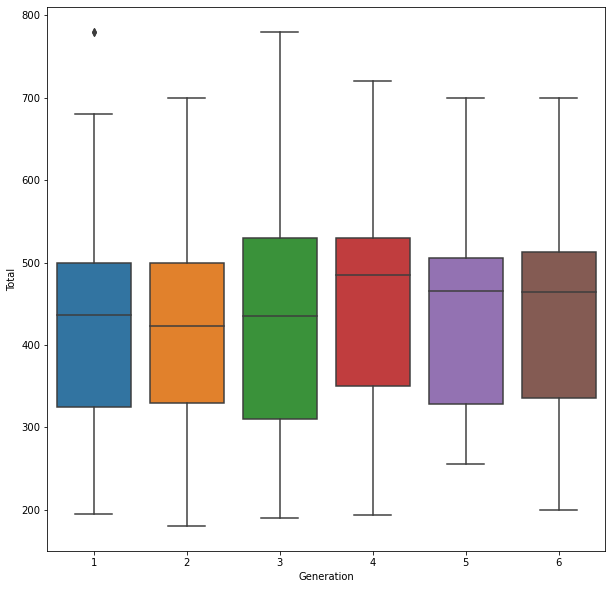

In [61]:
#포켓몬 능력 분포 탐색
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.boxplot(x='Generation', y='Total', data=df ,ax=ax)
plt.show()

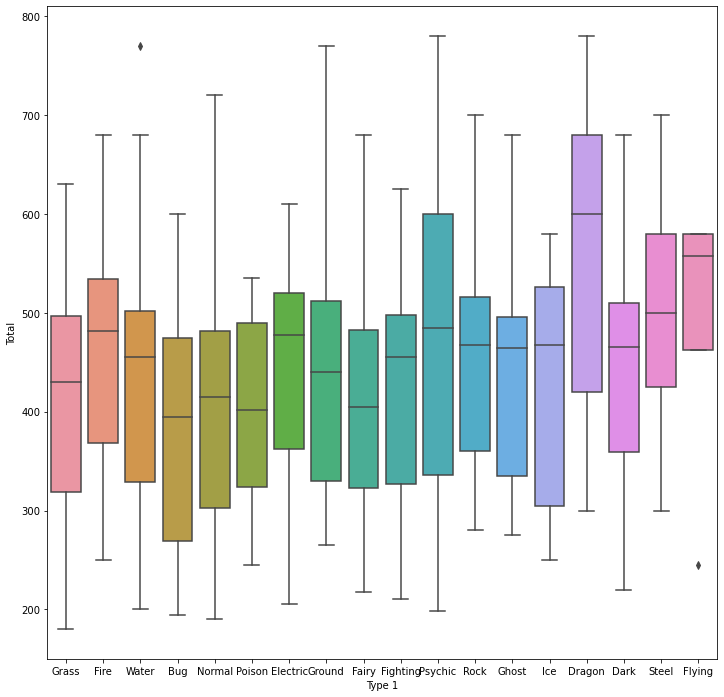

In [63]:
fig=plt.figure(figsize=(12,12))
ax=fig.gca()
sns.boxplot(x='Type 1', y='Total', data=df ,ax=ax)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [143]:
#지도 학습 기반 분류 분석을 하기 위한 데이터 전처리 
#데이터 타입 변경 

df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)
preprocessed_df= df[['Type 1', 'Type 2' ,'Total', 'HP','Attack','Defense', 'Sp. Atk','Sp. Def', 'Speed', 'Generation', 'Legendary' ]]

preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [144]:
#원핫인코딩
encoded_df=pd.get_dummies(preprocessed_df['Type 1'])
encoded_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    object
 12  Legendary   800 non-null    int32 
dtypes: int32(1), int64(8), object(4)
memory usage: 78.2+ KB


In [146]:
#pokemon type list 생성 

def make_list(x1, x2):
    type_list =[]
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['Type']=preprocessed_df.apply(lambda x: make_list(x['Type 1'], x['Type 2']), axis=1)
preprocessed_df.head()

C:\Users\hongm\anaconda3\envs\ck\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [147]:
del preprocessed_df['Type 1']
del preprocessed_df['Type 2']
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]


In [148]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Total       800 non-null    int64 
 1   HP          800 non-null    int64 
 2   Attack      800 non-null    int64 
 3   Defense     800 non-null    int64 
 4   Sp. Atk     800 non-null    int64 
 5   Sp. Def     800 non-null    int64 
 6   Speed       800 non-null    int64 
 7   Generation  800 non-null    object
 8   Legendary   800 non-null    int32 
 9   Type        800 non-null    object
dtypes: int32(1), int64(7), object(2)
memory usage: 59.5+ KB


In [149]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(mlb.fit_transform(preprocessed_df.pop('Type')),
                                                    columns=mlb.classes_))
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
preprocessed_df = pd.get_dummies(preprocessed_df)
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [174]:
#피처 표준화로 -0~1 사이의 스케일로 변화하여 더 좋은 결과를 얻게 할 수 있다. 
# StandardScaler VS MinMaxScaler 사용 했을때, 첫음에는 MInMax 좋은 결과를 얻었지만 
#1:1 모델링 이후에 confusiion matrix가 다 떨어짐.  결과적으로 성능이 더욱 떨어짐

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scale_columns=['Total', 'HP','Attack','Defense', 'Sp. Atk','Sp. Def', 'Speed',]
preprocessed_df[scale_columns]= scaler.fit_transform(preprocessed_df[scale_columns])
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [175]:
#데이터셋 분리

from sklearn.model_selection import train_test_split

X= preprocessed_df.loc[:,preprocessed_df.columns != 'Legendary']
Y= preprocessed_df['Legendary']
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.25 , random_state=33)

In [176]:
print(x_train.shape)
print(x_test.shape)

(600, 31)
(200, 31)


In [177]:
#모델 학습 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#train LR
lr =LogisticRegression(random_state=0)
lr.fit(x_train, y_train )


y_pred = lr.predict(x_test) 

In [178]:
#모델 평가

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

#정확도와 정밀도만 높게 나오고 재현율이 낮게 나옴 --> 문제 파악을 위해 

accuracy: 0.95
Precision : 0.615
Recall : 0.667
F1 : 0.640


In [179]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#class 의 불균형이 있음을 확인할 수 있다. 

[[183   5]
 [  4   8]]


In [180]:
#class의 불균형 조정
preprocessed_df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [181]:
# 1:1 샘플링

positive_random_idx = preprocessed_df[preprocessed_df['Legendary']==1].sample(65, random_state=33).index.tolist()
nagative_random_idx = preprocessed_df[preprocessed_df['Legendary']==0].sample(65, random_state=33).index.tolist()

In [182]:
positive_random_idx


[796,
 537,
 704,
 164,
 262,
 429,
 542,
 707,
 705,
 264,
 551,
 430,
 418,
 163,
 424,
 706,
 157,
 545,
 431,
 710,
 708,
 702,
 156,
 699,
 428,
 703,
 538,
 420,
 795,
 540,
 793,
 270,
 798,
 544,
 794,
 426,
 711,
 797,
 799,
 552,
 712,
 709,
 419,
 425,
 414,
 415,
 550,
 700,
 539,
 416,
 541,
 543,
 701,
 553,
 417,
 422,
 549,
 162,
 792,
 269,
 421,
 158,
 427,
 263,
 423]

In [183]:
random_idx = positive_random_idx + nagative_random_idx

X= preprocessed_df.loc[random_idx ,preprocessed_df.columns != 'Legendary']
Y= preprocessed_df['Legendary'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.25 , random_state=33)

In [184]:
print(x_train.shape)
print(x_test.shape)

(97, 31)
(33, 31)


In [185]:
#모델 재학습 
#train LR
lr =LogisticRegression(random_state=0)
lr.fit(x_train, y_train )


y_pred = lr.predict(x_test) 

In [186]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.97
Precision : 0.923
Recall : 1.000
F1 : 0.960


In [187]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#클레스의 불균형을 조정해주면 적은 데이터로도 좋은 결과를 얻을 수 있다. 

[[20  1]
 [ 0 12]]
